## Importing libraries and dataset

We import essential Python libraries for data manipulation, visualization, and analysis, and load the dataset for further exploration.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
data = pd.read_csv(r'C:\Users\user\Downloads\Customer.csv') 


## Exploratory Data Analysis (EDA)

We perform an initial analysis to understand the dataset's structure.

In [4]:
data.head()

Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3                        12          Satisfied  
4                        55        Unsatisfied

In [5]:
data.shape

(350, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [7]:
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

## Data cleaning

In [8]:
data = data.dropna()


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [11]:
data.describe()

Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   348.000000  348.000000   348.000000       348.000000      348.000000   
mean    275.887931   33.577586   847.793103        12.632184        4.023563   
std     101.304611    4.878024   361.692375         4.146079        0.579145   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.750000   30.000000   505.750000         9.000000        3.500000   
50%     276.500000   32.000000   780.200000        12.000000        4.100000   
75%     363.250000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                348.000000  
mean                  26.614943  
std                   13.474750  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                   38.000000  
max                   63.000000

In [12]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [13]:
def analyze_customer_ids(data):
    unique_customers = data['Customer ID'].nunique()
    duplicate_ids = data.duplicated(subset='Customer ID').any()
    print(f'Number of Unique Customers: {unique_customers}\n any duplicate id? {duplicate_ids}')

analyze_customer_ids(data)

Number of Unique Customers: 348
 any duplicate id? False


## Data Distribution Visualization

We visualize the distribution of key variables to better understand the data

In [14]:
data.hist(bins=30, figsize=(10, 8))
plt.show()

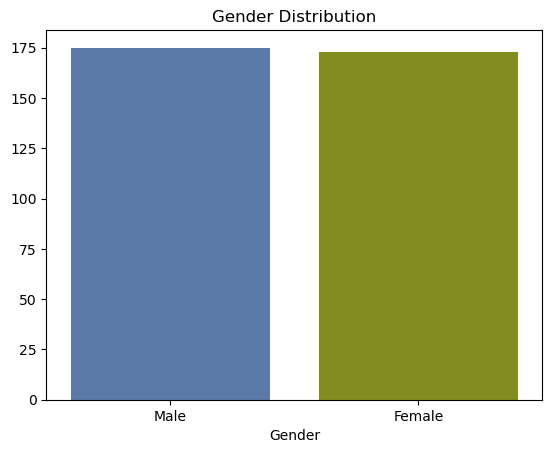

In [31]:
def gender_analysis(data):
    gender_distribution = data['Gender'].value_counts()
    custom_colors = ['#4f77b4', '#8f9f0e']
    sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette = custom_colors)
    
    plt.title('Gender Distribution')
    plt.show()
gender_analysis(data)

In [16]:
def analyze_gender(data):
    spending_by_gender=data.groupby('Gender')['Total Spend'].mean()
    px.bar(x=spending_by_gender.index, y=spending_by_gender.values, labels={'x':'Gender', 'y':'Average Spend'}, title='Average Spending by Gender').show()
analyze_gender(data)                    


In [17]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

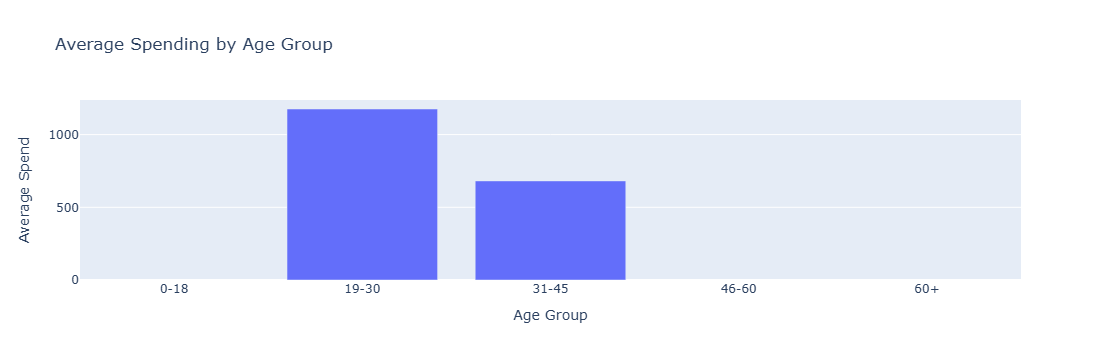

In [18]:
def analyze_age(data):
    age_groups = pd.cut(data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])
    data['Age Group'] = age_groups

    age_vs_spend = data.groupby('Age Group')['Total Spend'].mean()
    px.bar(x=age_vs_spend.index, y=age_vs_spend.values, labels={'x':'Age Group', 'y':'Average Spend', 'color':'Blues'}, title='Average Spending by Age Group').show()

analyze_age(data)

## City-wise Spending and Customer Segmentation

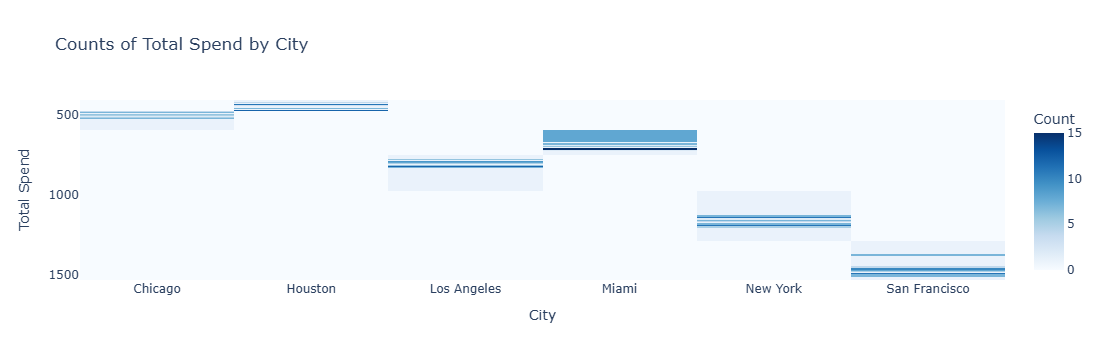

In [19]:
crosstab_counts = pd.crosstab(data['Total Spend'], data['City'])

fig = px.imshow(crosstab_counts, text_auto=True, color_continuous_scale='Blues',
                labels={'x': 'City', 'y': 'Total Spend', 'color': 'Count'},
                title='Counts of Total Spend by City')
fig.show()

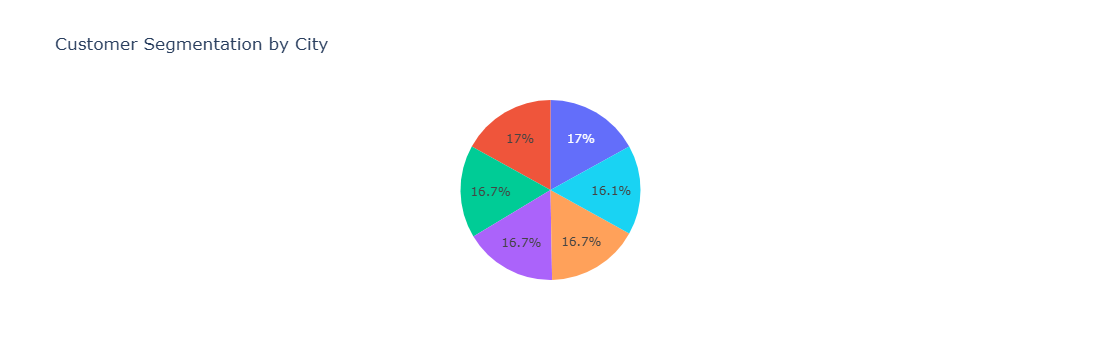

In [20]:
# Analyzing Customer Segmentation by City.
def analyze_city(data):
    city_segments = data.groupby('City').size()
    px.pie(labels=city_segments.index, values=city_segments.values, title='Customer Segmentation by City').show()

analyze_city(data)

In [21]:
crossline =pd.crosstab(data.Gender , data.City, values= data.Age, aggfunc= np.average)
crossline 

City      Chicago    Houston  Los Angeles      Miami   New York  San Francisco
Gender                                                                        
Female  42.017241  36.696429          NaN  29.000000  30.706897            NaN
Male          NaN        NaN    34.118644  28.947368  31.000000       29.12069

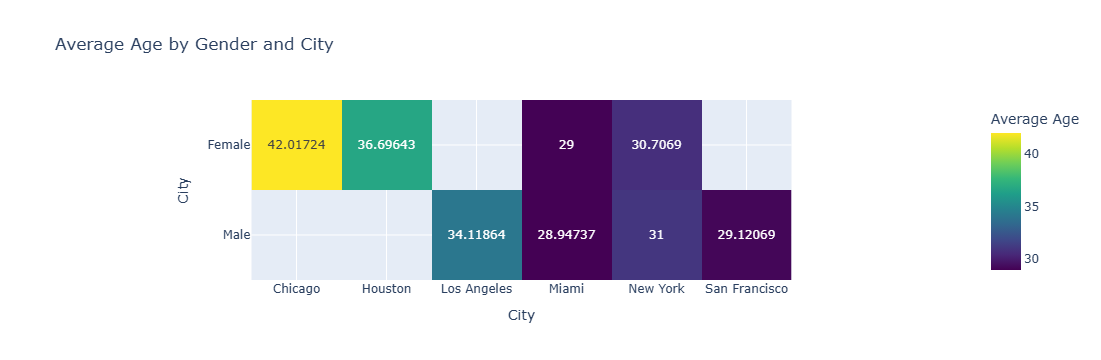

In [22]:
crossline_long = crossline.reset_index().melt(id_vars = 'Gender', var_name = 'City', value_name = 'Average Age')
fig = px.imshow(crossline, text_auto=True, color_continuous_scale='viridis',
                labels={'x':'City', 'y':'City', 'color':'Average Age'},
                title='Average Age by Gender and City')
fig.show()

## Membership Type Analysis

In [23]:
MembershipType = data['Membership Type'].value_counts().reset_index()
MembershipType

Membership Type  count
0            Gold    117
1          Silver    117
2          Bronze    114

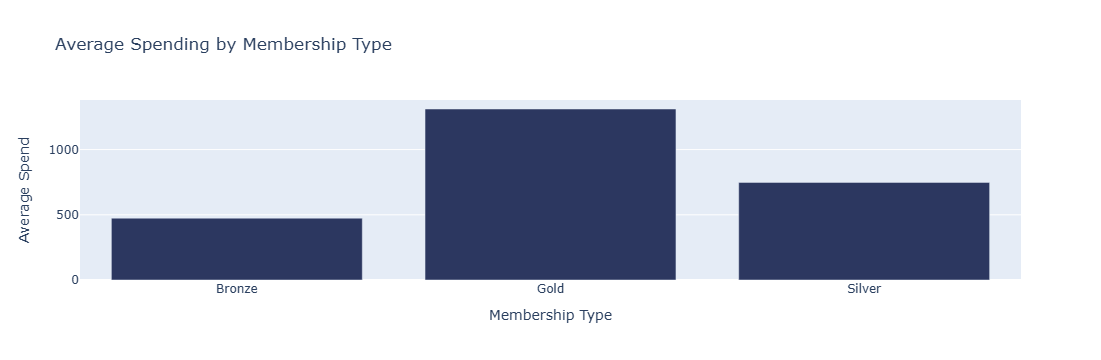

In [24]:
# Analyzing Average Spending by Membership Type.
def analyze_membership(data):
    membership_vs_spend = data.groupby('Membership Type')['Total Spend'].mean()
    px.bar(x=membership_vs_spend.index,
           y=membership_vs_spend.values, labels={'x':'Membership Type', 
                                                 'y':'Average Spend'},
           color_discrete_sequence=['#2C3760'],
           title='Average Spending by Membership Type').show()

analyze_membership(data)

## Items Purchased and Spending Correlations

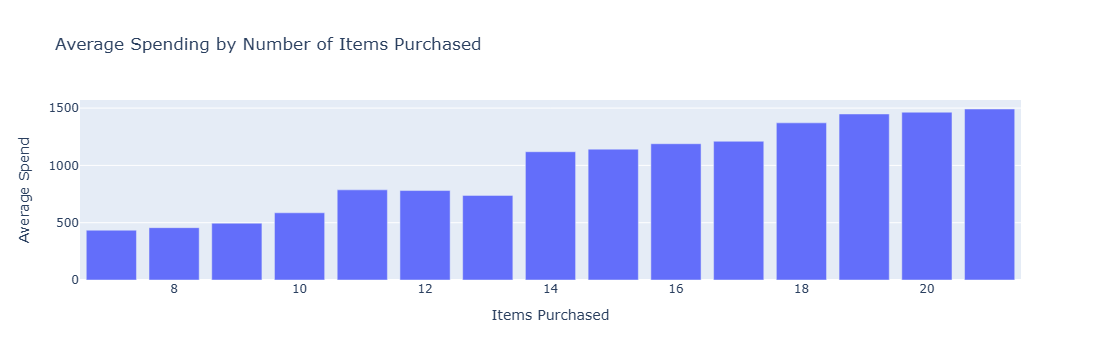

In [25]:
def analyze_items_purchased(data):
    items_vs_spend = data.groupby('Items Purchased')['Total Spend'].mean()
    px.bar(x=items_vs_spend.index, y=items_vs_spend.values, labels={'x':'Items Purchased', 'y':'Average Spend'}, title='Average Spending by Number of Items Purchased').show()

analyze_items_purchased(data)

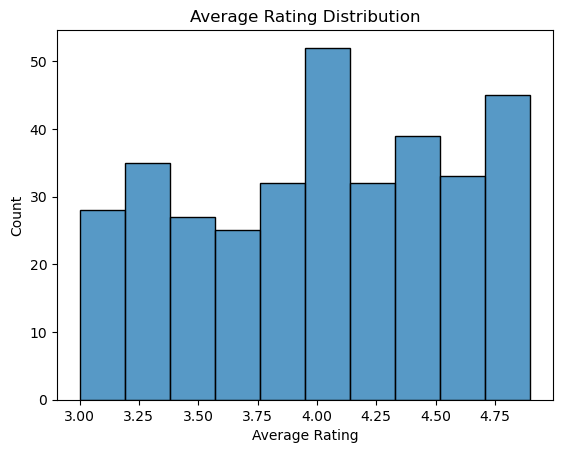

In [26]:
def analyze_ratings(data):
    sns.histplot(data['Average Rating'])
    plt.title('Average Rating Distribution')
    plt.show()

analyze_ratings(data)

## Analyzing Distributions 

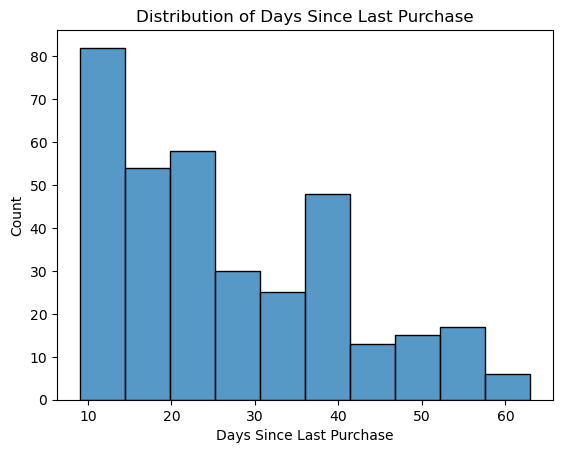

In [27]:
# Analyzing Distribution of Days Since Last Purchase.
def analyze_days_since_last_purchase(data):
    sns.histplot(data['Days Since Last Purchase'])
    plt.title('Distribution of Days Since Last Purchase')
    plt.show()

analyze_days_since_last_purchase(data)
                                     

In [28]:
satisfaction_count = data['Satisfaction Level'].value_counts()
satisfaction_count

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64

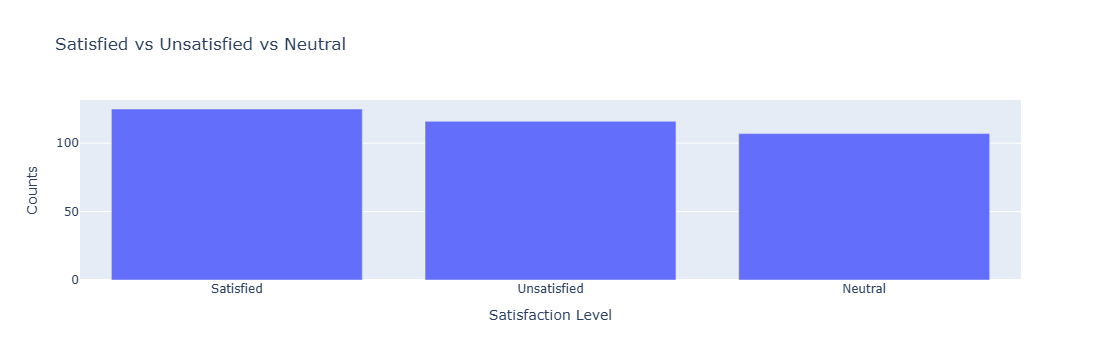

In [29]:
fig = px.bar(satisfaction_count, x=satisfaction_count.index, y=satisfaction_count.values,
             labels = {'x' : 'Satisfaction Level', 'y' : 'Counts'},
             title = 'Satisfied vs Unsatisfied vs Neutral')
fig.show()

In [30]:
# Visualizing correlation matrix with a heatmap.
def correlation_heatmap(data):
    correlation_matrix = data[['Age', 'Total Spend', 'Items Purchased', 'Average Rating']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

correlation_heatmap(data)